In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

## Load Partial Model

In [4]:
from prophet.serialize import model_to_json, model_from_json

with open('Partial_mv_model.json', 'r') as fin:
    saved_mv_model = model_from_json(fin.read())  # Load model

Importing plotly failed. Interactive plots will not work.


## Load processed Future Data

In [5]:
future_df = pd.read_csv('processed_future_data.csv')

In [6]:
future_df.drop(columns=['Unnamed: 0'], inplace=True)

In [7]:
future_df

,Date,temp,dew,humidity,windspeed,winddir,cloudcover,visibility
0,2022-06-13 00:00:00,36.0,14.0,26.86,9.4,230.0,50.0,3.0
1,2022-06-13 00:15:00,36.0,14.0,26.86,9.4,230.0,50.0,3.0
2,2022-06-13 00:30:00,36.0,14.0,26.86,9.4,230.0,50.0,3.0
3,2022-06-13 00:45:00,36.0,14.0,26.86,9.4,230.0,50.0,3.0
4,2022-06-13 01:00:00,35.0,15.0,30.28,9.4,230.0,50.0,3.0
...,...,...,...,...,...,...,...,...
1340,2022-06-26 23:00:00,35.9,21.5,43.51,23.8,121.9,55.2,24.1
1341,2022-06-26 23:15:00,35.9,21.5,43.51,23.8,121.9,55.2,24.1
1342,2022-06-26 23:30:00,35.9,21.5,43.51,23.8,121.9,55.2,24.1
1343,2022-06-26 23:45:00,35.9,21.5,43.51,23.8,121.9,55.2,24.1


In [8]:
future_df.rename(columns={'Date':'ds'}, inplace=True)

In [9]:
future_df

,ds,temp,dew,humidity,windspeed,winddir,cloudcover,visibility
0,2022-06-13 00:00:00,36.0,14.0,26.86,9.4,230.0,50.0,3.0
1,2022-06-13 00:15:00,36.0,14.0,26.86,9.4,230.0,50.0,3.0
2,2022-06-13 00:30:00,36.0,14.0,26.86,9.4,230.0,50.0,3.0
3,2022-06-13 00:45:00,36.0,14.0,26.86,9.4,230.0,50.0,3.0
4,2022-06-13 01:00:00,35.0,15.0,30.28,9.4,230.0,50.0,3.0
...,...,...,...,...,...,...,...,...
1340,2022-06-26 23:00:00,35.9,21.5,43.51,23.8,121.9,55.2,24.1
1341,2022-06-26 23:15:00,35.9,21.5,43.51,23.8,121.9,55.2,24.1
1342,2022-06-26 23:30:00,35.9,21.5,43.51,23.8,121.9,55.2,24.1
1343,2022-06-26 23:45:00,35.9,21.5,43.51,23.8,121.9,55.2,24.1


In [34]:
future_df['cap'] = 10000

## Make predictions on Future Data

In [35]:
predictions = saved_mv_model.predict(future_df)

In [36]:
predictions

,ds,trend,cap,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,...,windspeed,windspeed_lower,windspeed_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-06-13 00:00:00,9999.993393,10000,9972.127498,12296.470057,9999.992732,9999.993942,1149.767946,1149.767946,1149.767946,...,-11.063921,-11.063921,-11.063921,283.650179,283.650179,283.650179,0.0,0.0,0.0,11149.761338
1,2022-06-13 00:15:00,9999.993393,10000,10076.952856,12179.981252,9999.992733,9999.993942,1137.630243,1137.630243,1137.630243,...,-11.063921,-11.063921,-11.063921,284.645453,284.645453,284.645453,0.0,0.0,0.0,11137.623636
2,2022-06-13 00:30:00,9999.993393,10000,10071.554444,12140.281426,9999.992733,9999.993943,1129.563319,1129.563319,1129.563319,...,-11.063921,-11.063921,-11.063921,285.641535,285.641535,285.641535,0.0,0.0,0.0,11129.556712
3,2022-06-13 00:45:00,9999.993394,10000,10041.371436,12248.119733,9999.992734,9999.993943,1125.299453,1125.299453,1125.299453,...,-11.063921,-11.063921,-11.063921,286.638423,286.638423,286.638423,0.0,0.0,0.0,11125.292847
4,2022-06-13 01:00:00,9999.993394,10000,9990.780054,12133.092688,9999.992734,9999.993944,1047.207947,1047.207947,1047.207947,...,-11.063921,-11.063921,-11.063921,287.636116,287.636116,287.636116,0.0,0.0,0.0,11047.201341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1340,2022-06-26 23:00:00,9999.993986,10000,7248.319135,9464.970565,9999.993366,9999.994502,-1632.214136,-1632.214136,-1632.214136,...,-134.641833,-134.641833,-134.641833,1833.487461,1833.487461,1833.487461,0.0,0.0,0.0,8367.779850
1341,2022-06-26 23:15:00,9999.993987,10000,7241.184737,9377.776171,9999.993366,9999.994503,-1660.833200,-1660.833200,-1660.833200,...,-134.641833,-134.641833,-134.641833,1834.337461,1834.337461,1834.337461,0.0,0.0,0.0,8339.160787
1342,2022-06-26 23:30:00,9999.993987,10000,7304.368310,9521.142523,9999.993366,9999.994503,-1685.751623,-1685.751623,-1685.751623,...,-134.641833,-134.641833,-134.641833,1835.186335,1835.186335,1835.186335,0.0,0.0,0.0,8314.242364
1343,2022-06-26 23:45:00,9999.993987,10000,7258.746067,9415.781489,9999.993367,9999.994503,-1706.560943,-1706.560943,-1706.560943,...,-134.641833,-134.641833,-134.641833,1836.034082,1836.034082,1836.034082,0.0,0.0,0.0,8293.433045


In [37]:
future_predictions = predictions[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

In [38]:
future_predictions

,ds,yhat,yhat_lower,yhat_upper
0,2022-06-13 00:00:00,11149.761338,9972.127498,12296.470057
1,2022-06-13 00:15:00,11137.623636,10076.952856,12179.981252
2,2022-06-13 00:30:00,11129.556712,10071.554444,12140.281426
3,2022-06-13 00:45:00,11125.292847,10041.371436,12248.119733
4,2022-06-13 01:00:00,11047.201341,9990.780054,12133.092688
...,...,...,...,...
1340,2022-06-26 23:00:00,8367.779850,7248.319135,9464.970565
1341,2022-06-26 23:15:00,8339.160787,7241.184737,9377.776171
1342,2022-06-26 23:30:00,8314.242364,7304.368310,9521.142523
1343,2022-06-26 23:45:00,8293.433045,7258.746067,9415.781489


## Plot Predictions

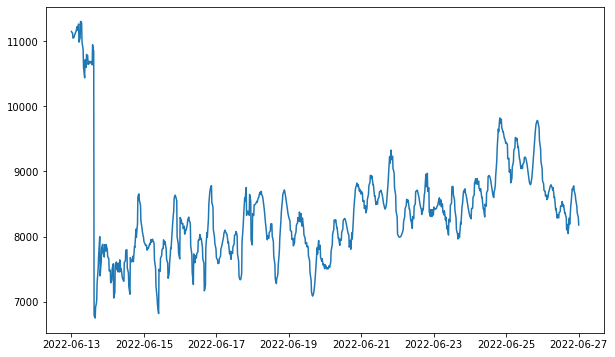

In [39]:
plt.rcParams["figure.figsize"] = (10,6)
plt.plot(future_predictions['ds'], future_predictions['yhat'])

In [40]:
factual = pd.read_csv('future_actual_load.csv')

In [41]:
factual

,Unnamed: 0,Date,Haryana Load (MW)
0,0,2022-06-14 00:15:00,9000.18
1,1,2022-06-14 00:30:00,8768.38
2,2,2022-06-14 00:45:00,8777.00
3,3,2022-06-14 01:00:00,9093.66
4,4,2022-06-14 01:15:00,9082.27
...,...,...,...
564,564,2022-06-19 22:45:00,7538.72
565,565,2022-06-19 23:00:00,7307.08
566,566,2022-06-19 23:15:00,7204.57
567,567,2022-06-19 23:30:00,7194.45


In [42]:
future_predictions

,ds,yhat,yhat_lower,yhat_upper
0,2022-06-13 00:00:00,11149.761338,9972.127498,12296.470057
1,2022-06-13 00:15:00,11137.623636,10076.952856,12179.981252
2,2022-06-13 00:30:00,11129.556712,10071.554444,12140.281426
3,2022-06-13 00:45:00,11125.292847,10041.371436,12248.119733
4,2022-06-13 01:00:00,11047.201341,9990.780054,12133.092688
...,...,...,...,...
1340,2022-06-26 23:00:00,8367.779850,7248.319135,9464.970565
1341,2022-06-26 23:15:00,8339.160787,7241.184737,9377.776171
1342,2022-06-26 23:30:00,8314.242364,7304.368310,9521.142523
1343,2022-06-26 23:45:00,8293.433045,7258.746067,9415.781489


In [43]:
future_predictions.index[future_predictions['ds'] == '2022-06-14 00:15:00']

Int64Index([97], dtype='int64')

In [44]:
future_predictions.index[future_predictions['ds'] == '2022-06-19 23:45:00']

Int64Index([671], dtype='int64')

In [45]:
future_predictions = future_predictions[97:672]

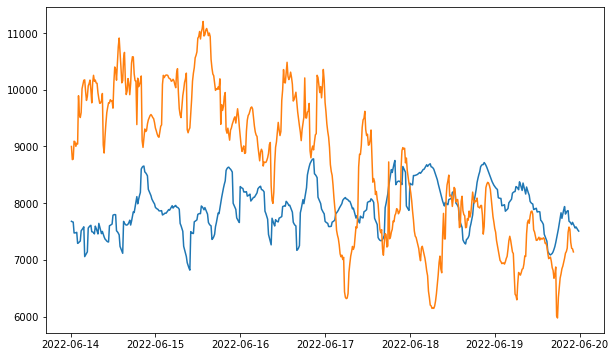

In [46]:
plt.rcParams["figure.figsize"] = (10,6)
plt.plot(future_predictions['ds'], future_predictions['yhat'])
plt.plot(future_predictions['ds'][:569], factual['Haryana Load (MW)'])